In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train = pd.read_csv("train_cleaned.csv")


## Logistic regression

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [95]:
train = pd.read_csv("train_cleaned.csv")

In [96]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [98]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

lr = LogisticRegression(max_iter=500, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 0.1, 'solver': 'lbfgs'}


In [99]:
best_lr = grid_search.best_estimator_
y_pred_final = best_lr.predict(X_val_scaled)

In [100]:
print("Optimized Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_final))
print(classification_report(y_val, y_pred_final))
print(confusion_matrix(y_val, y_pred_final))

Optimized Logistic Regression Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[87 18]
 [18 56]]


## Random Forest Classifier

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_rf = pd.read_csv("train_cleaned.csv")

X_rf = df_rf.drop('Survived', axis=1)
y_rf = df_rf['Survived']

X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf
)

print("Train shape:", X_train_rf.shape)
print("Validation shape:", X_val_rf.shape)


Train shape: (712, 11)
Validation shape: (179, 11)


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline: scaling + RandomForest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

print("Random Forest pipeline defined.")


Random Forest pipeline defined.


In [103]:
# Definir el grid de hiperparámetros
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2']
}

print("Grid de hiperparámetros definido.")


Grid de hiperparámetros definido.


In [104]:
# Definir GridSearchCV
grid_search_rf = GridSearchCV(
    pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("GridSearchCV definido para Random Forest.")


GridSearchCV definido para Random Forest.


In [105]:
from sklearn.model_selection import GridSearchCV

# Definir GridSearchCV con barra de progreso
grid_search_rf = GridSearchCV(
    pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2  # <- aquí activamos la barra de progreso
)

# Ejecutar GridSearch
grid_search_rf.fit(X_train_rf, y_train_rf)

print("GridSearchCV finalizado.")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
GridSearchCV finalizado.


In [106]:
# Mejores parámetros encontrados
print("Best Parameters:", grid_search_rf.best_params_)

# Mejor score promedio en cross-validation
print("Best CV Score:", grid_search_rf.best_score_)

Best Parameters: {'rf__max_depth': 5, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best CV Score: 0.8301191765980498


In [107]:
# Predicciones en validation set
y_pred_rf = grid_search_rf.predict(X_val_rf)

print("Predicciones realizadas.")

Predicciones realizadas.


In [108]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Optimized Random Forest Accuracy:", accuracy_score(y_val_rf, y_pred_rf))

# Reporte completo
print(classification_report(y_val_rf, y_pred_rf))

# Matriz de confusión
print(confusion_matrix(y_val_rf, y_pred_rf))

Optimized Random Forest Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

[[97 13]
 [19 50]]


## Gradient Boosting Classifier

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [111]:
y_pred_gb = gb.predict(X_val)

In [112]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))

print(classification_report(y_val, y_pred_gb))

print(confusion_matrix(y_val, y_pred_gb))


Gradient Boosting Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

[[92 13]
 [21 53]]


## Support Vector Machine (SVM)

In [113]:
from sklearn.svm import SVC

In [114]:
svm = SVC(kernel='rbf', gamma='scale', random_state=42)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [115]:
y_pred_svm = svm.predict(X_val)

In [116]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))

print(classification_report(y_val, y_pred_svm))

print(confusion_matrix(y_val, y_pred_svm))


SVM Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

[[92 13]
 [18 56]]


## K-Nearest Neighbors (KNN)

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [119]:
y_pred_knn = knn.predict(X_val)

In [120]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))

print(classification_report(y_val, y_pred_knn))

print(confusion_matrix(y_val, y_pred_knn))


KNN Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       105
           1       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

[[90 15]
 [14 60]]


## Model Comparison

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [122]:
models = {
    'Logistic Regression': y_pred,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'SVM': y_pred_svm,
    'KNN': y_pred_knn
}


In [123]:
results = []

for name, y_pred_model in models.items():
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_val, y_pred_model),
        'Precision': precision_score(y_val, y_pred_model),
        'Recall': recall_score(y_val, y_pred_model),
        'F1-Score': f1_score(y_val, y_pred_model)
    })

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.798883,0.756757,0.756757,0.756757
1,Random Forest,0.502793,0.380952,0.324324,0.350365
2,Gradient Boosting,0.810056,0.803030,0.716216,0.757143
3,SVM,0.826816,0.811594,0.756757,0.783217
4,KNN,0.837989,0.800000,0.810811,0.805369


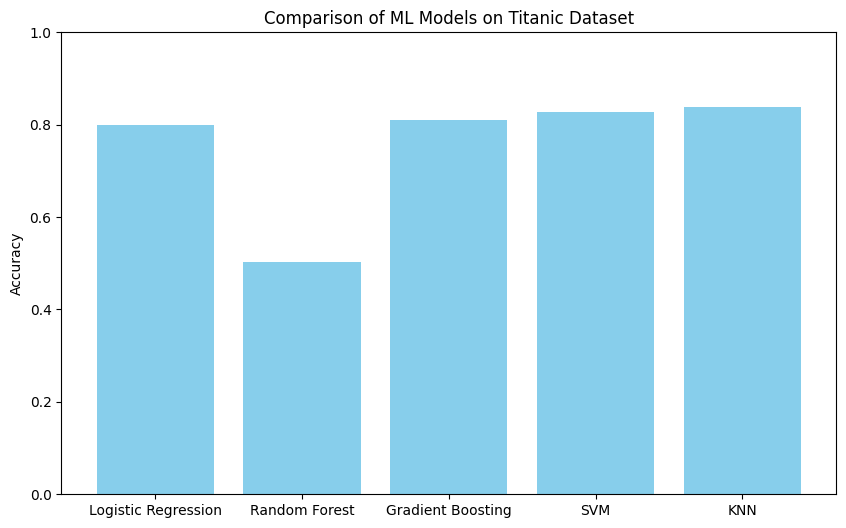

In [124]:
plt.figure(figsize=(10,6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.ylabel('Accuracy')
plt.title('Comparison of ML Models on Titanic Dataset')
plt.ylim(0,1)
plt.show()


In [125]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

n_models = len(results_df['Model'])

x = np.arange(n_models)

width = 0.2


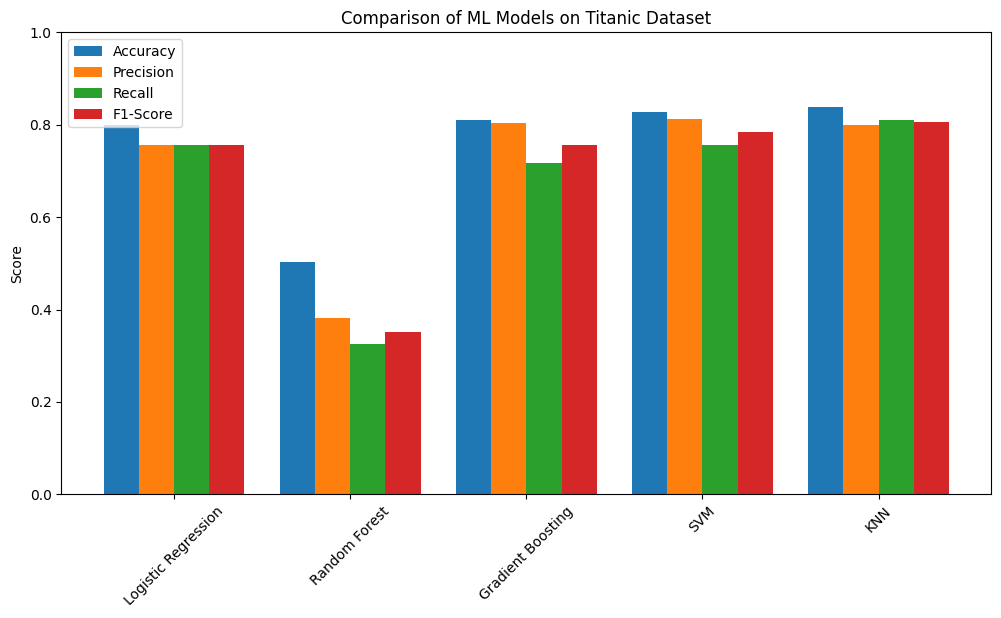

In [126]:
plt.figure(figsize=(12,6))

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results_df[metric], width, label=metric)

plt.xticks(x + 1.5*width, results_df['Model'], rotation=45)
plt.ylabel('Score')
plt.ylim(0,1)
plt.title('Comparison of ML Models on Titanic Dataset')
plt.legend()
plt.show()
